# **Data Science mega case study**

---



## Data Preparation and Exploratory Data Analysis (EDA)

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from google.colab import drive
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# this method mounts my google drive to this notebook
# drive.mount('/content/drive')

Mounted at /content/drive


### Import Data

In [3]:
# to convert the diabetes dataset to a dataframe and assign it to a df variable
df = pd.read_csv('./diabetes-2-1.csv')
# to get the shape of a dataframe
df.shape

(768, 9)

### Total Number of records

In [4]:
# to print the number of records in this dataframe
print("Number of records:", df.shape[0])

Number of records: 768


### Data Types for all columns

In [5]:
# to check the type of all variables in this dataframe
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Checking for missing values

In [6]:
# Created a funtion to reduce redunancy

def check_missing_values(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Print the count of missing values for each column
    print("Missing Values:\n", missing_values)

    # Calculate the percentage of missing values for each column
    total_entries = len(df)
    percentage_missing = (missing_values / total_entries) * 100

    # Print the percentage of missing values for each column
    print("\nPercentage of Missing Values:\n", percentage_missing)

check_missing_values(df)





Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Percentage of Missing Values:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


### Descriptive Statistics

In [7]:
# to show descriptive statistics of the dataframe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Columns with missing values and find out their frequency.

In [8]:
# Exclude "Outcome" and "Pregnancies" columns from the check because the zeros are meaningful
columns_to_ignore = ["Outcome", "Pregnancies"]
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display columns with a minimum value of 0
print("Columns with a missing values:")
print(missing_values)

Columns with a missing values:
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### Number of positive and negative patients based on target (dependent) variable

Outcome
0    500
1    268
Name: count, dtype: int64


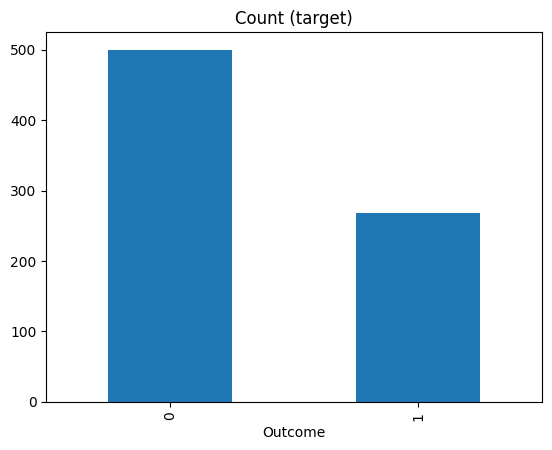

In [9]:
# Count of positive and negative outcomes
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)
# Plot thr outcome counts
outcome_counts.plot(kind='bar', title='Count (target)');

### Correlation among all dependent and independent variables

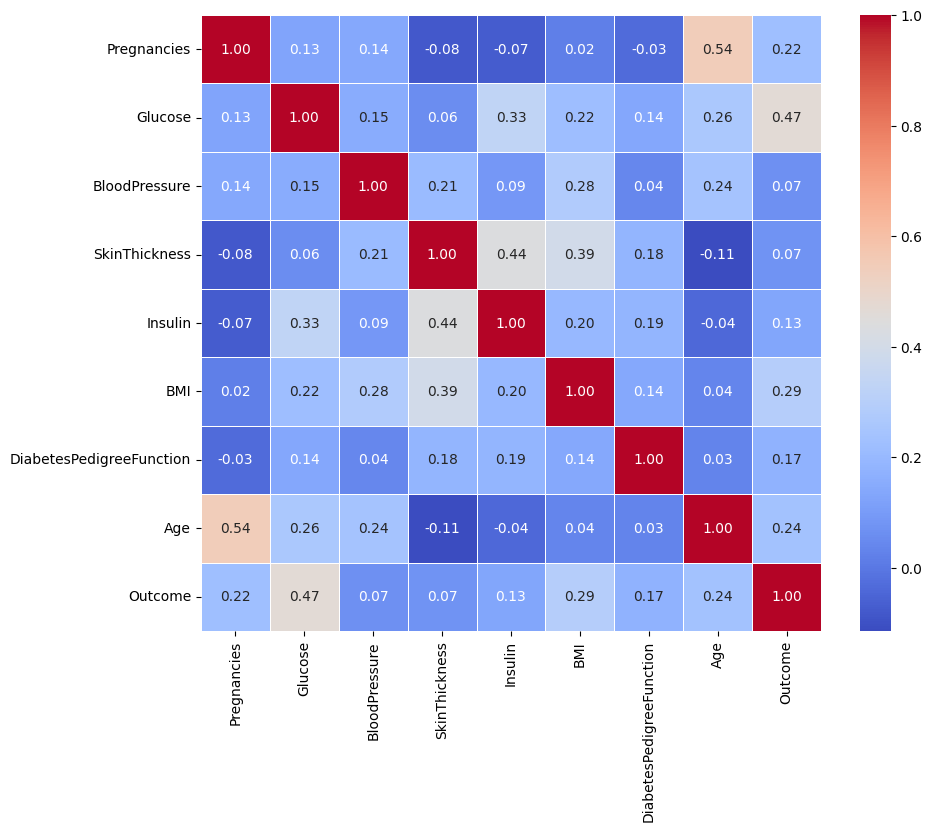

In [10]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

In [11]:
# Replace all occurrences of 0 with NaN in selected columns
replaced_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]
df[replaced_columns] = df[replaced_columns].replace({0: np.nan})

# Display the DataFrame after replacement
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Check out the variables for 0 value once again

In [12]:
# Columns to be ignored during the missing values calculation
columns_to_ignore = ["Outcome", "Pregnancies"]

# Exclude specified columns and count the occurrences of 0
missing_values = (df.drop(columns=columns_to_ignore) == 0).sum()

# Display the count of missing values
missing_values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### Check out the missing values counts per variable

In [13]:
# use isna method to check for missing values in the dataframe
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Identify the mean value for each variable

In [14]:
# use mean method method to check for the mean for each variable in the data frame

df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### fill missing values with mean column values


In [15]:
# use the fillna method to replace the empty values with the mean in each column with empty values
df.fillna( {'Glucose': df['Glucose'].mean(), 'BloodPressure': df['BloodPressure'].mean(), 'SkinThickness': df['SkinThickness'].mean(), 'Insulin': df['Insulin'].mean(), 'BMI': df['BMI'].mean()}, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
# to show descriptive statistics of the dataframe

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Distribution per variable

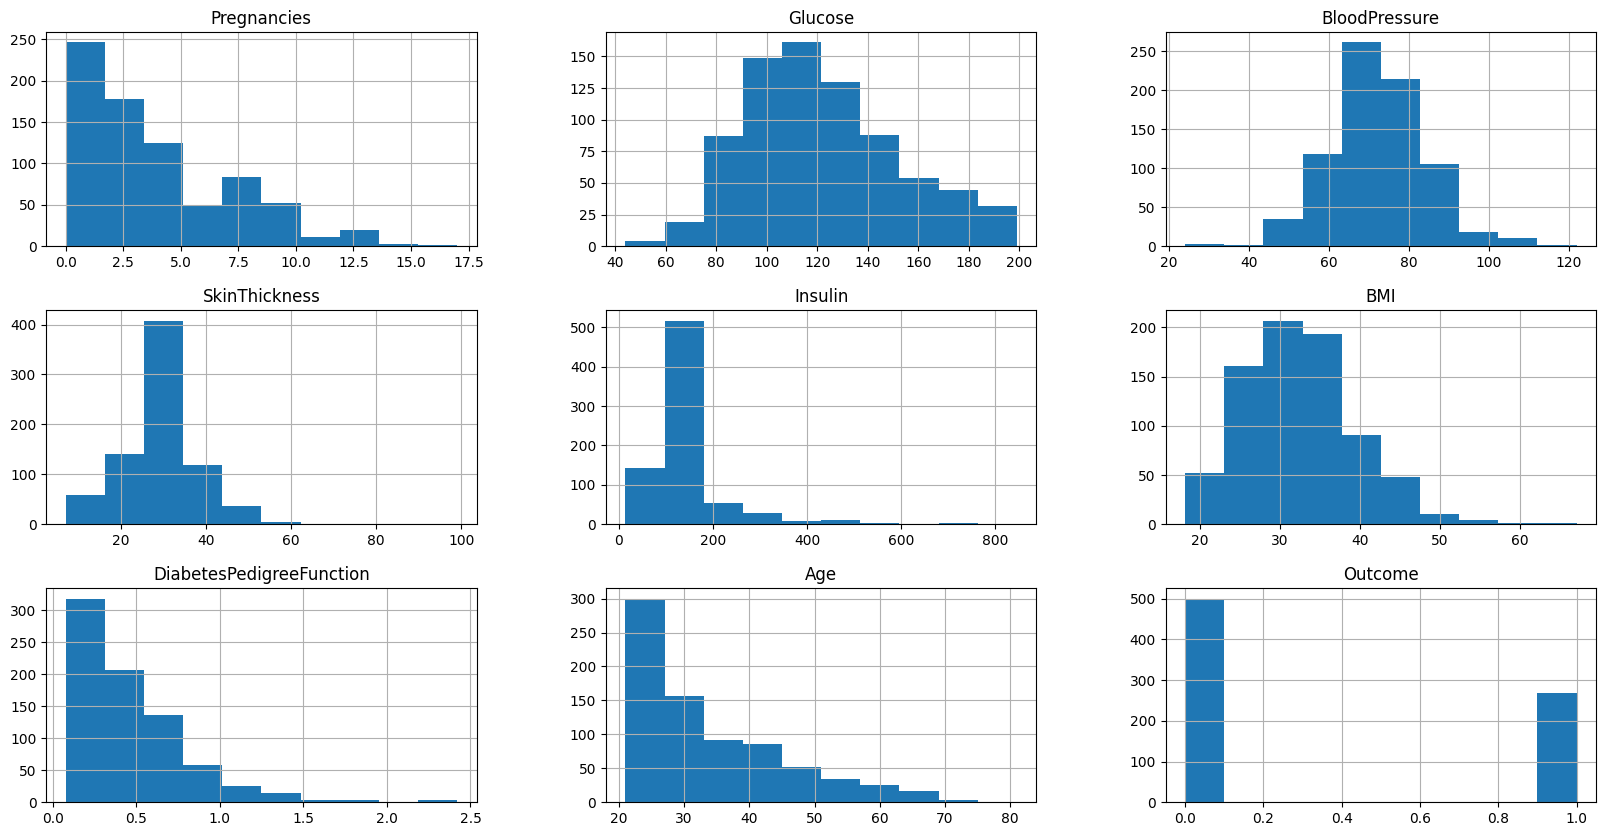

In [17]:
# To plot data distribution of all variables in the dataset
df.hist(figsize=(20, 10))
plt.show()

The distribution of pregnancies in this dataset is right-skewed, with a notable prevalence of women having zero pregnancies. The skewness indicates that a substantial portion of the dataset consists of individuals who have not been pregnant, and as the number of pregnancies increases, the frequency of individuals with higher pregnancy counts decreases.
Glucose : On the dataset, more than 120 individuals exhibit a glucose level up to 120. This suggests that a significant portion of the population studied has a glucose concentration within a range considered normal or below a certain threshold.
A symmetrical histogram of blood pressure values suggests a balanced distribution of measurements around a central point. In this case, the symmetry implies that roughly an equal number of individuals exhibit blood pressure values above and below the central tendency. This balance in the distribution indicates that the data is evenly spread across a range of blood pressure values, with no significant skewness towards higher or lower readings.
Skin Thickness is Right Skewed
The distribution of Body Mass Index (BMI) values in this dataset is symmetrical. This symmetry implies that individuals with BMIs above and below the central tendency are evenly distributed, contributing to a balanced representation of BMI values in the studied population.
Diabetes Pedigree Function is Right Skewed
The distribution of ages in this dataset is right-skewed, signifying that a significant proportion of individuals have lower ages. As age increases, the frequency of individuals decreases, with fewer occurrences of higher age values

### Box Plot for Each Variable

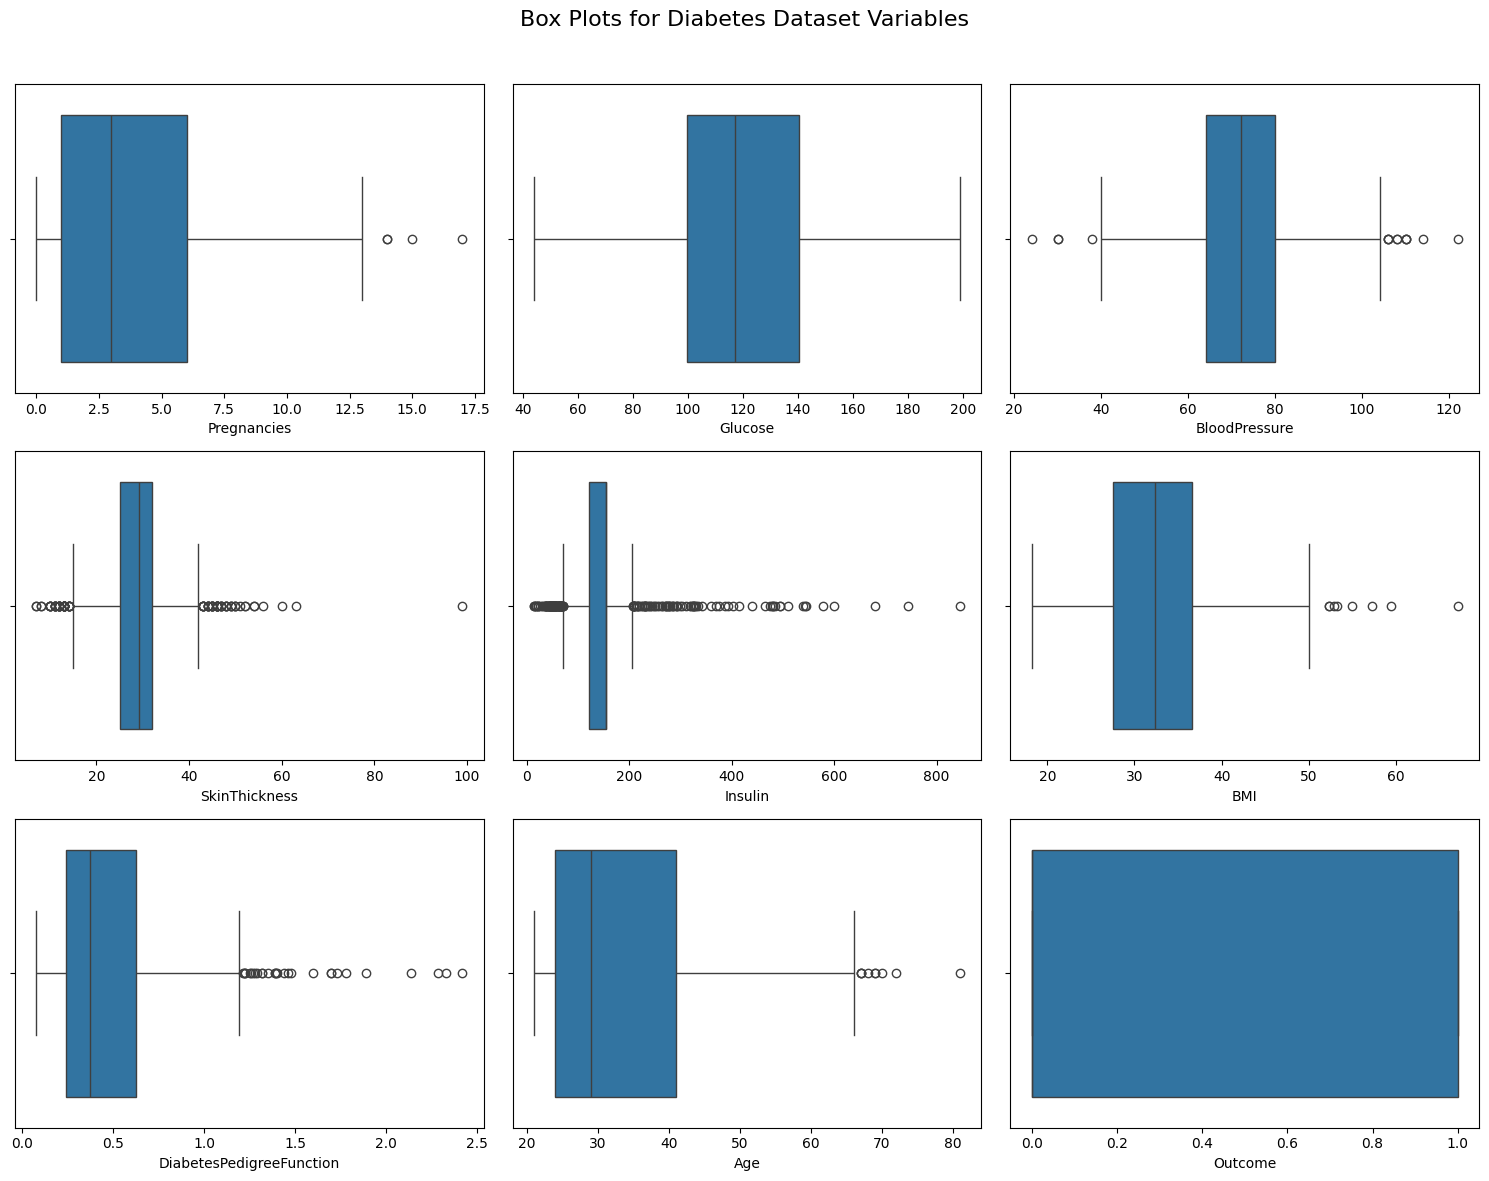

In [18]:

# Box plots for all variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Box Plots for Diabetes Dataset Variables', fontsize=16)

sns.boxplot(ax=axes[0, 0], x=df['Pregnancies'])
sns.boxplot(ax=axes[0, 1], x=df['Glucose'])
sns.boxplot(ax=axes[0, 2], x=df['BloodPressure'])
sns.boxplot(ax=axes[1, 0], x=df['SkinThickness'])
sns.boxplot(ax=axes[1, 1], x=df['Insulin'])
sns.boxplot(ax=axes[1, 2], x=df['BMI'])
sns.boxplot(ax=axes[2, 0], x=df['DiabetesPedigreeFunction'])
sns.boxplot(ax=axes[2, 1], x=df['Age'])
sns.boxplot(ax=axes[2, 2], x=df['Outcome'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Pregnancies:
The median number of pregnancies is around 3, with a significant number of outliers on the higher side.
The interquartile range (IQR) spans from approximately 1 to 6 pregnancies.
Glucose:
The median glucose level is around 117, with a relatively narrow IQR.
There are no outliers in the glucose distribution.
BloodPressure:
The median blood pressure is around 72, and the IQR spans from approximately 64 to 80.
There are no outliers in the blood pressure distribution.
SkinThickness:
The median skin thickness is approximately 29.
The distribution has a wide range, and there are potential outliers on the higher side.
Insulin:
The median insulin level is around 155, with a significant number of outliers on the higher side.
The IQR is relatively narrow compared to the spread of the data.
BMI (Body Mass Index):
The median BMI is around 32.4, with a wide distribution and a few potential outliers on the higher side.
DiabetesPedigreeFunction:
The median value for the diabetes pedigree function is around 0.37.
The distribution has a moderate spread, and there are a few potential outliers on the higher side.
Age:
The median age is around 29, with a relatively narrow IQR.
There are a few potential outliers on the higher side of the age distribution.
Outcome:
Since Outcome is a binary variable (0 or 1), the box plot shows the distribution of outcomes.

 ### Remove Outliers

## Feature Engineering

In [19]:
# Identify outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask to filter outliers
outlier_mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# To Remove the outliers from the dataset
df = df[outlier_mask]


print("New DataFrame size after Outlier removal:", df.shape)

New DataFrame size after Outlier removal: (515, 9)


### Creation of new variable BMI_tier

In [20]:
def categorize_bmi(bmi):
    """
    Categorizes BMI into specific tiers based on the given BMI value.

    Args:
    - bmi (float): Body Mass Index (BMI) value to be categorized.

    Returns:
    - str: Categorical label representing the BMI tier.
           Possible values: "NA", "Underweight", "Normal", "Overweight", "Obese".
    """
    if bmi == 0:
        return "NA"
    elif 0 < bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi:
        return "Obese"

# Apply the categorize_bmi function to create a new column 'BMI_tier'
df["BMI_tier"] = df['BMI'].apply(categorize_bmi)
df


<ipython-input-20-e434741feac3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI_tier"] = df['BMI'].apply(categorize_bmi)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,Normal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obese


### BMI tier histogram

<Axes: >

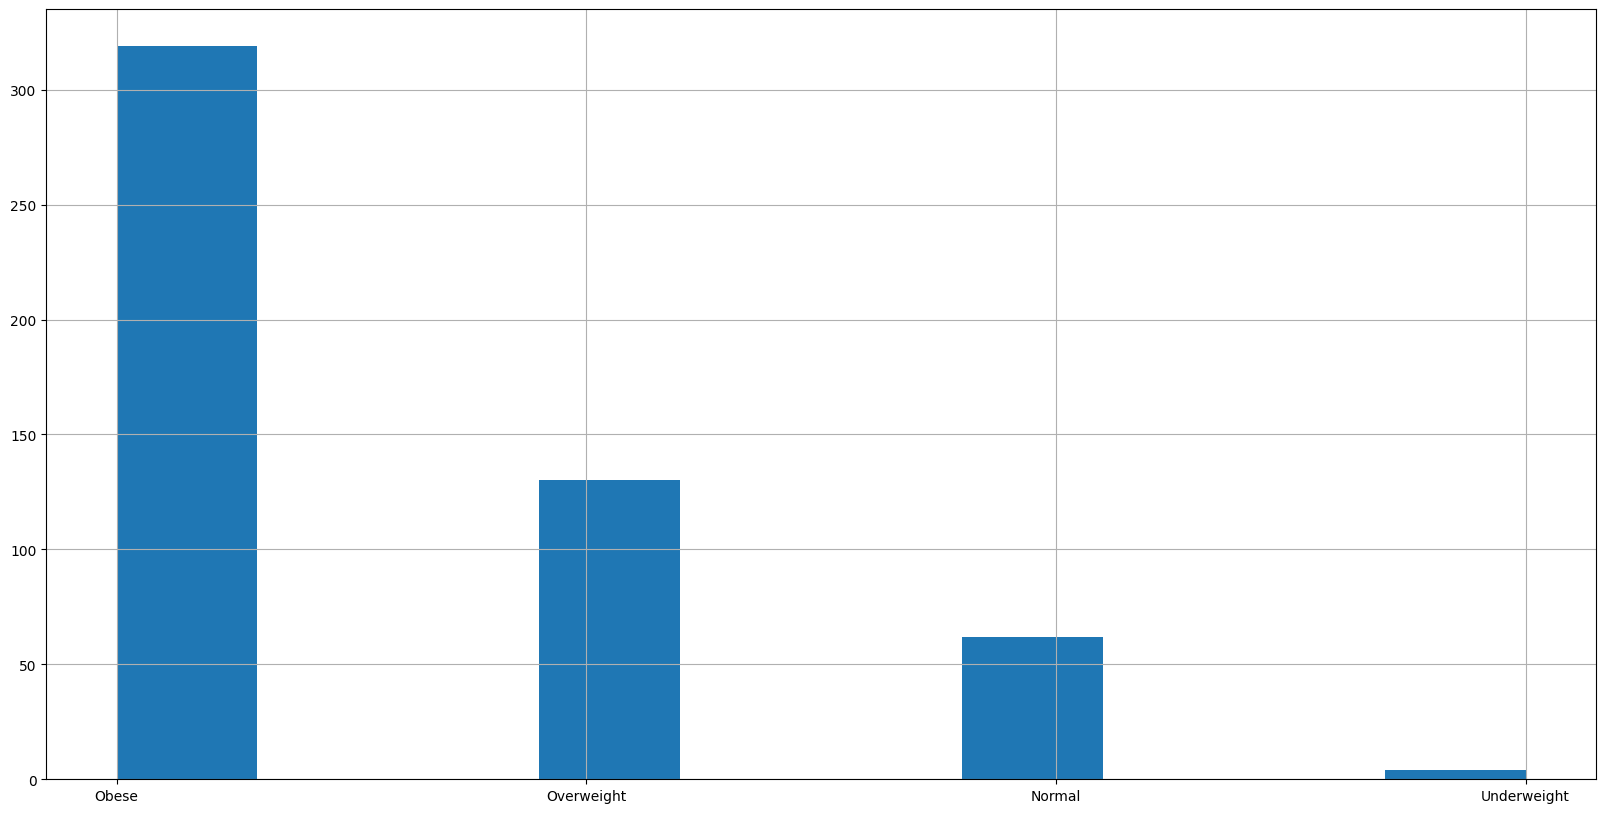

In [21]:
df["BMI_tier"].hist(figsize=(20, 10))

 ### Number of Obese individuals and pie chart

Number of Obese Individuals: 319


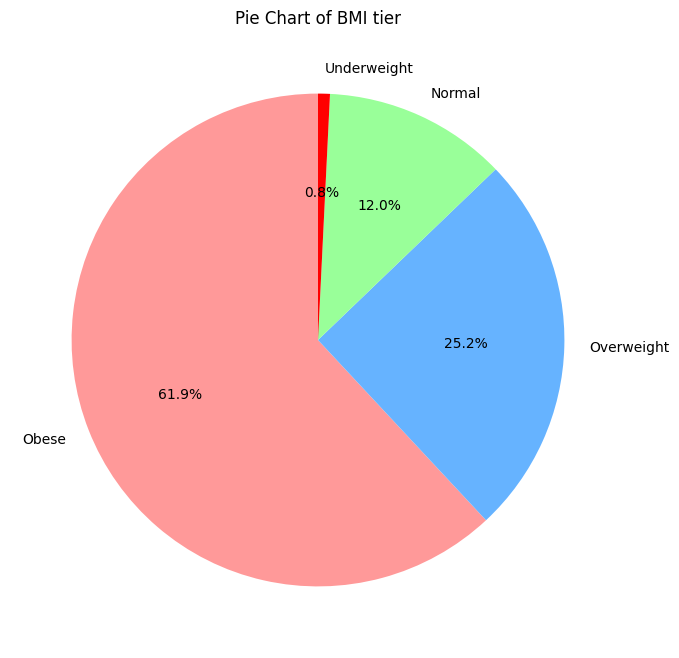

In [22]:

category_counts = df['BMI_tier'].value_counts()
obese_count = (df['BMI_tier'] == 'Obese').sum()
print("Number of Obese Individuals:",obese_count)
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99', "#FF0000"])
plt.title('Pie Chart of BMI tier')
plt.ylabel('')
plt.show()




### New categorical variable based on Oral Glucose Tolerance Test (Glucose)

In [23]:
def categorize_ogtt(glucose):
    """
    Categorizes Oral Glucose Tolerance Test (OGTT) values into specific tiers based on the given glucose level.

    Args:
    - glucose (float): Glucose level from the Oral Glucose Tolerance Test (OGTT) to be categorized.

    Returns:
    - str: Categorical label representing the OGTT tier.
           Possible values: "NA", "Normal", "Impaired Glucose Tolerance", "Diabetic Level".
    """
    if glucose == 0:
        return "NA"
    elif glucose < 140:
        return "Normal"
    elif 140 <= glucose < 198:
        return "Impaired Glucose Tolerance"
    elif 198 <= glucose:
        return "Diabetic Level"

# Apply the categorize_ogtt function to create a new column 'OGTT_tier'
df['OGTT_tier'] = df['Glucose'].apply(categorize_ogtt)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier,OGTT_tier
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obese,Impaired Glucose Tolerance
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal,Impaired Glucose Tolerance
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight,Normal
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,Overweight,Normal


### OGTT Tier Histogram

Number of Diabetic Individuals: 0


<Axes: >

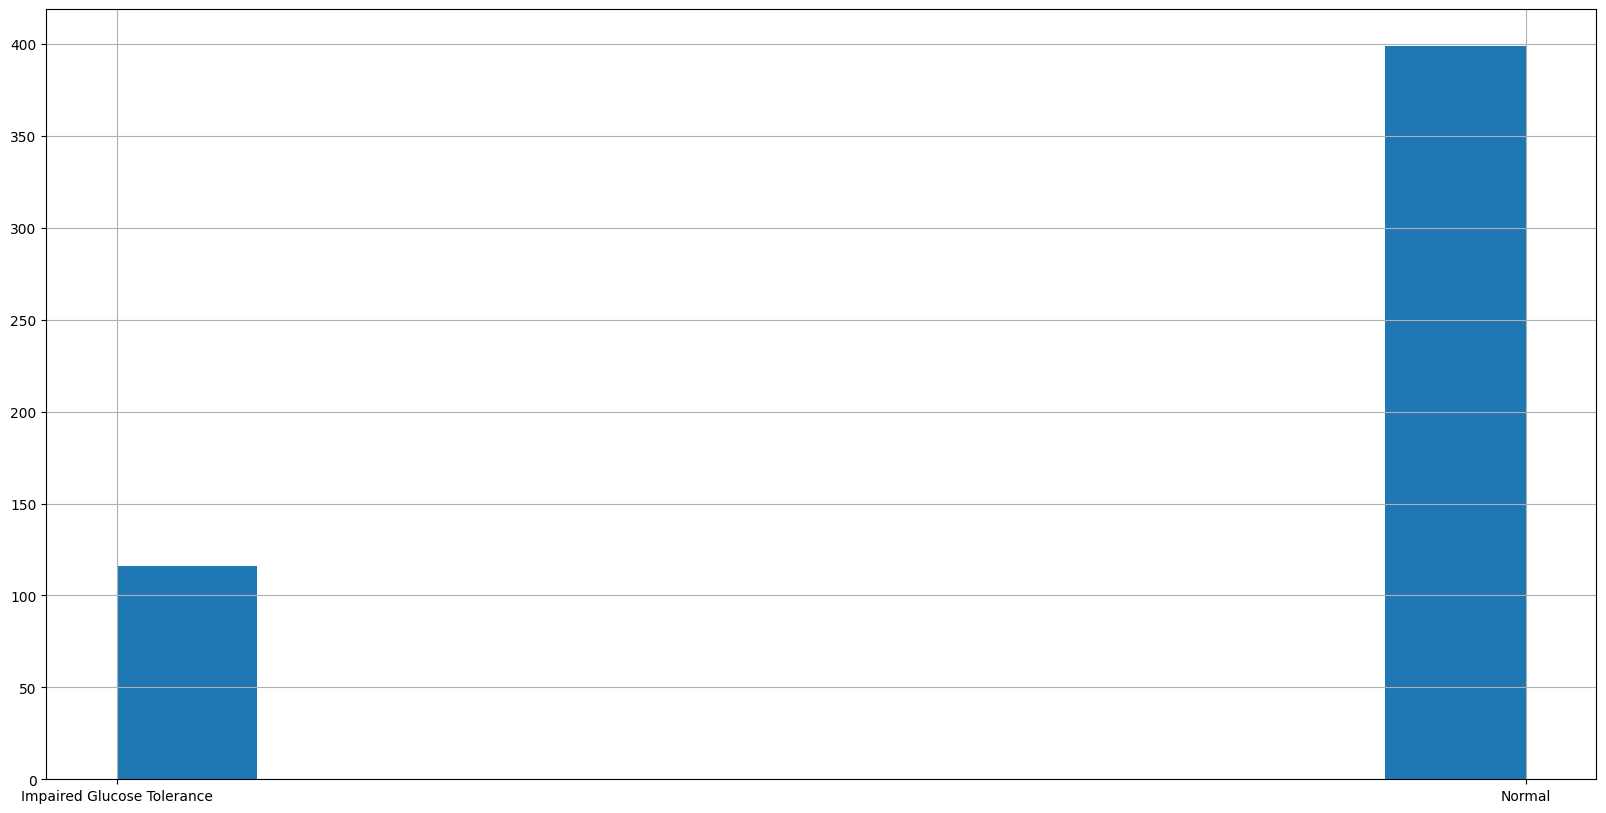

In [24]:
# Count the number of individuals classified as 'Diabetic Level' in the 'OGTT_tier' column
diabetic_count = (df['OGTT_tier'] == 'Diabetic Level').sum()

# Print the number of diabetic individuals
print("Number of Diabetic Individuals:", diabetic_count)

# Plot a histogram of the 'OGTT_tier' column to visualize the distribution of OGTT tiers
df["OGTT_tier"].hist(figsize=(20, 10))


Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?

Number of individuals with 'Impaired Glucose Tolerance' and diabetes: 79
Number of individuals with 'Normal' OGTT_tier and diabetes: 100


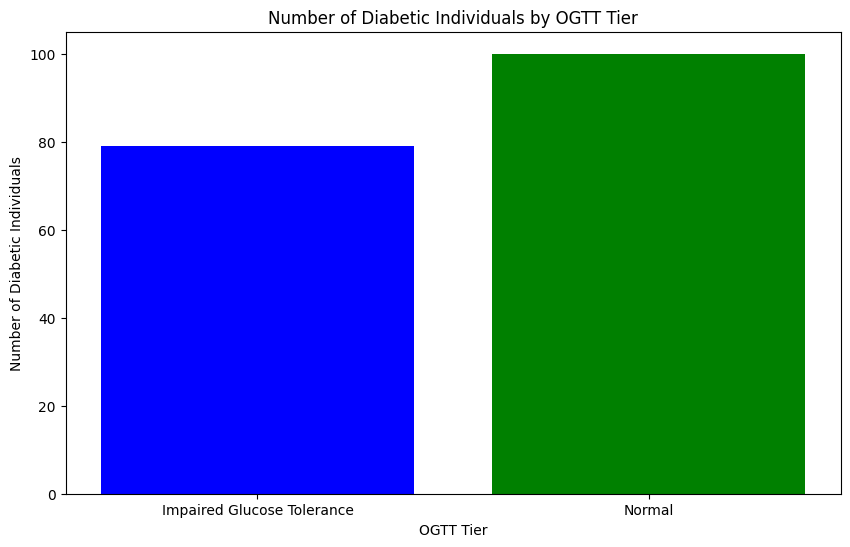

In [25]:
# Count the number of individuals with 'Impaired Glucose Tolerance' and diabetes
impaired_glucose_diabetic_count = df[(df['OGTT_tier'] == 'Impaired Glucose Tolerance') & (df['Outcome'] == 1)].shape[0]

# Count the number of individuals with 'Normal' OGTT_tier and diabetes
normal_ogtt_diabetic_count = df[(df['OGTT_tier'] == 'Normal') & (df['Outcome'] == 1)].shape[0]

# Print the counts of individuals with 'Impaired Glucose Tolerance' and 'Normal' OGTT_tier
print("Number of individuals with 'Impaired Glucose Tolerance' and diabetes:", impaired_glucose_diabetic_count)
print("Number of individuals with 'Normal' OGTT_tier and diabetes:", normal_ogtt_diabetic_count)



# Create a bar plot to visualize the counts of diabetic individuals with 'Impaired Glucose Tolerance' and 'Normal' OGTT_tier
plt.figure(figsize=(10, 6))
plt.bar(['Impaired Glucose Tolerance', 'Normal'], [impaired_glucose_diabetic_count, normal_ogtt_diabetic_count], color=['blue', 'green'])
plt.xlabel('OGTT Tier')
plt.ylabel('Number of Diabetic Individuals')
plt.title('Number of Diabetic Individuals by OGTT Tier')
plt.show()

### Encode Categorical Variables

In [26]:
# Perform one-hot encoding for the 'BMI_tier' and 'OGTT_tier' columns
encoded_df = pd.get_dummies(df, columns=['BMI_tier', 'OGTT_tier'])

# Display the first few rows of the encoded DataFrame
encoded_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier_Normal,BMI_tier_Obese,BMI_tier_Overweight,BMI_tier_Underweight,OGTT_tier_Impaired Glucose Tolerance,OGTT_tier_Normal
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,False,True,False,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,False,False,True,False,False,True
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,True,False,False,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,False,False,True,False,False,True
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,False,False,True,False,False,True


In [27]:
# Assign the encoded DataFrame 'encoded_df' back to the original DataFrame 'df'
df = encoded_df

# Display the DataFrame 'df'
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_tier_Normal,BMI_tier_Obese,BMI_tier_Overweight,BMI_tier_Underweight,OGTT_tier_Impaired Glucose Tolerance,OGTT_tier_Normal
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,False,True,False,False,True,False
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,False,False,True,False,False,True
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,True,False,False,False,True,False
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,False,False,True,False,False,True
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0,True,False,False,False,False,True
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,False,True,False,False,False,True
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,False,False,True,False,False,True
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,False,True,False,False,False,True


## Model Training and Evaluation

### Set Independent and dependent variables

In [28]:
# Extract features (X) and target variable (y) from the DataFrame
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

### Split the data into test and train sets

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=20)


### Training Model using different methods

#### Helper funtions


In [30]:

def plot_confusion_matrix(y_true, y_pred):
    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def calculate_specificity_sensitivity(y_test, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print(f"Model: {model_name}")
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    return specificity, sensitivity

def get_cross_val_scores(classifier, X_train, y_train, cv=5):
    """
    Perform k-fold cross-validation and return the cross-validation scores.

    Parameters:
    classifier : sklearn classifier object
        The classifier for which cross-validation needs to be performed.
    X_train : array-like of shape (n_samples, n_features)
        The input training data.
    y_train : array-like of shape (n_samples,)
        The target labels.
    cv : int, optional (default=5)
        Number of folds in cross-validation.

    Returns:
    cross_val_scores : array of shape (cv,)
        Array containing the cross-validation scores for each fold.
    """
    # Perform k-fold cross-validation
    cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=cv)

    return cross_val_scores

#### Support Vector Machine

In [31]:
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter for the SVC step
    'kernel': ['linear', 'rbf'],  # Kernel function for the SVC step
    'gamma': [0.01, 0.1, 1]  # Hyperparameter for some kernels (e.g., rbf) for the SVC step
}

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_

# Create a new SVM model with the best hyperparameters
best_svm = SVC(**best_params_svm)

# Fit the model to the training data
best_svm.fit(X_train, y_train)






SVC(C=0.1, gamma=0.01, kernel='linear')

##### Testing The Model

In [32]:
# svr_pipe.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of the Support Vector Machine pipeline: {accuracy_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print("Cross Validation Score",get_cross_val_scores(best_svm, X_train, y_train, cv=5 ).mean())

Accuracy of the Support Vector Machine pipeline: 0.7733
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       111
           1       0.82      0.46      0.59        61

    accuracy                           0.77       172
   macro avg       0.79      0.70      0.72       172
weighted avg       0.78      0.77      0.75       172

Cross Validation Score 0.7172208013640239


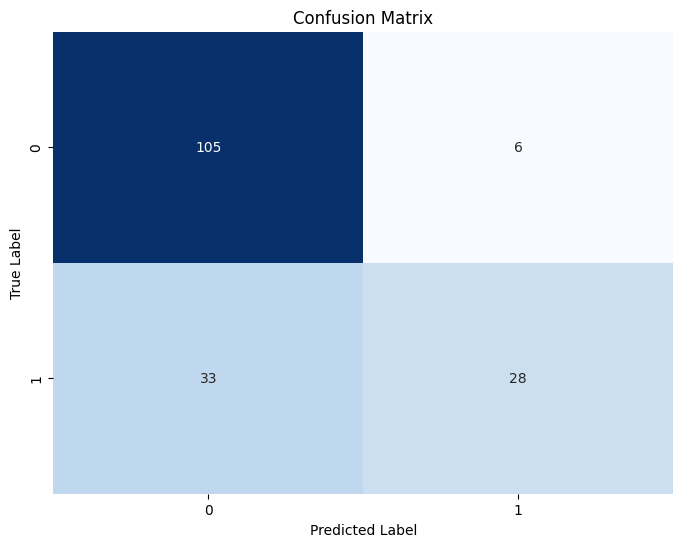

Model: Support Vector Machine
Sensitivity: 0.45901639344262296
Specificity: 0.9459459459459459


(0.9459459459459459, 0.45901639344262296)

In [33]:
plot_confusion_matrix(y_test, y_pred_svm)
calculate_specificity_sensitivity(y_test, y_pred_svm, "Support Vector Machine")

#### Logistic Regression

In [34]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  # Solver for optimization
}

# Perform grid search with cross-validation
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
best_params = grid_search_logreg.best_params_

# Create a logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(**best_params, max_iter=1000, class_weight='balanced')

# Fit the model to the training data
best_log_reg.fit(X_train, y_train)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   solver='newton-cg')

Testing the model


In [35]:
y_pred_lr = best_log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression pipeline: {accuracy_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print("Cross Validation Score",get_cross_val_scores(best_log_reg, X_train, y_train, cv=5 ).mean())

Accuracy of the Logistic Regression pipeline: 0.8023
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       111
           1       0.69      0.80      0.74        61

    accuracy                           0.80       172
   macro avg       0.79      0.80      0.79       172
weighted avg       0.81      0.80      0.81       172

Cross Validation Score 0.7112105711849958


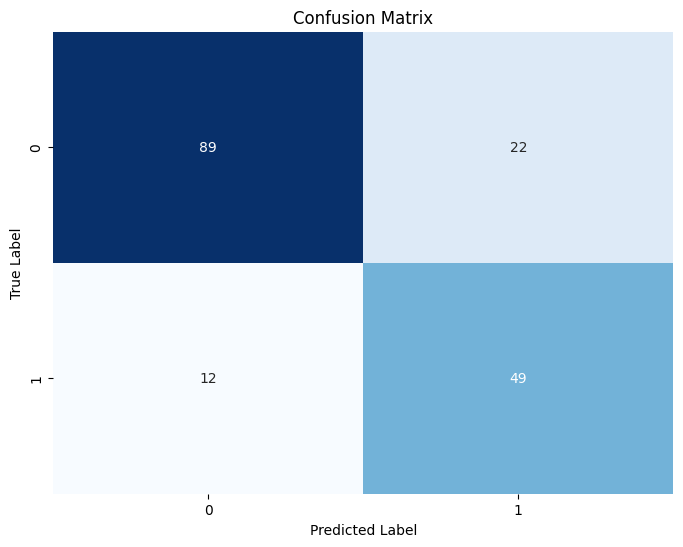

Model: Logistic Regression
Sensitivity: 0.8032786885245902
Specificity: 0.8018018018018018


array([[89, 22],
       [12, 49]])

In [36]:
plot_confusion_matrix(y_test, y_pred_lr)
calculate_specificity_sensitivity(y_test, y_pred_lr, "Logistic Regression")

confusion_matrix(y_test, y_pred_lr)


#### Random Forest Classifier

In [37]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

# Create the model
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
rf_clf_pipe = make_pipeline(StandardScaler(),RandomForestClassifier(**best_params))
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10))])

##### Testing The Model

In [38]:
rf_clf_pipe.predict(X_test)
y_pred_rf = rf_clf_pipe.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier pipeline: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print("Cross Validation Score",get_cross_val_scores(rf_clf_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Random Forest Classifier pipeline: 0.7267
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       111
           1       0.75      0.34      0.47        61

    accuracy                           0.73       172
   macro avg       0.74      0.64      0.64       172
weighted avg       0.73      0.73      0.69       172

Cross Validation Score 0.7695652173913043


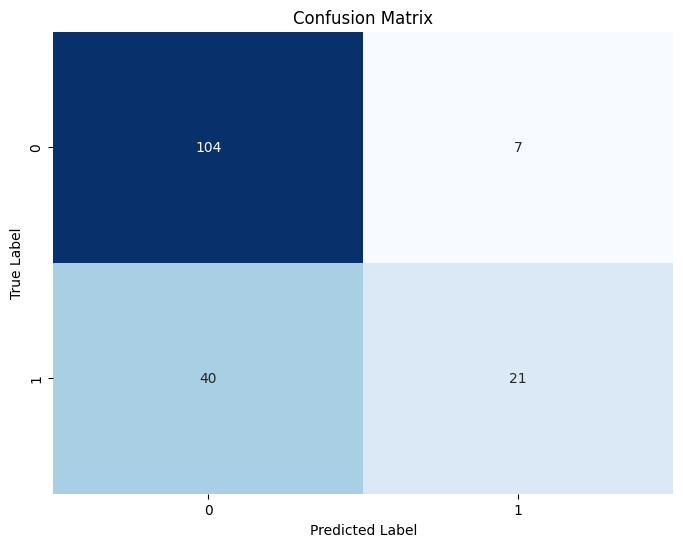

Model: Random Forest Classifier
Sensitivity: 0.3442622950819672
Specificity: 0.9369369369369369


(0.9369369369369369, 0.3442622950819672)

In [39]:
plot_confusion_matrix(y_test, y_pred_rf)
calculate_specificity_sensitivity(y_test, y_pred_rf, "Random Forest Classifier")

#### Gradient Boosting Classifier

In [40]:
gb_clf_pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier())
gb_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

Testing The Model

In [41]:
gb_clf_pipe.predict(X_test)
y_pred_gb = gb_clf_pipe.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of the Gradient Boosting Classifier pipeline: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))
print("Cross Validation Score",get_cross_val_scores(gb_clf_pipe, X_train, y_train, cv=5 ).mean())

Accuracy of the Gradient Boosting Classifier pipeline: 0.7267
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       111
           1       0.66      0.48      0.55        61

    accuracy                           0.73       172
   macro avg       0.70      0.67      0.68       172
weighted avg       0.72      0.73      0.71       172

Cross Validation Score 0.757843137254902


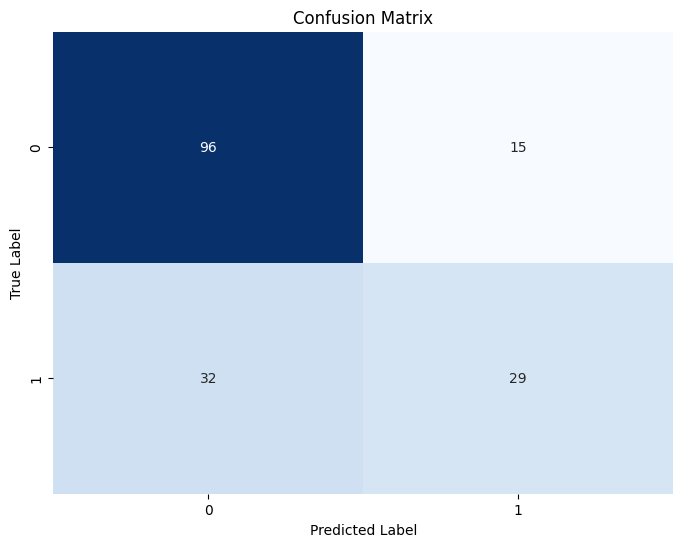

Model: Gradient Boosting Classifier
Sensitivity: 0.47540983606557374
Specificity: 0.8648648648648649


(0.8648648648648649, 0.47540983606557374)

In [42]:
plot_confusion_matrix(y_test, y_pred_gb)
calculate_specificity_sensitivity(y_test, y_pred_gb, "Gradient Boosting Classifier")

## Models Comparision

### ROC Curve

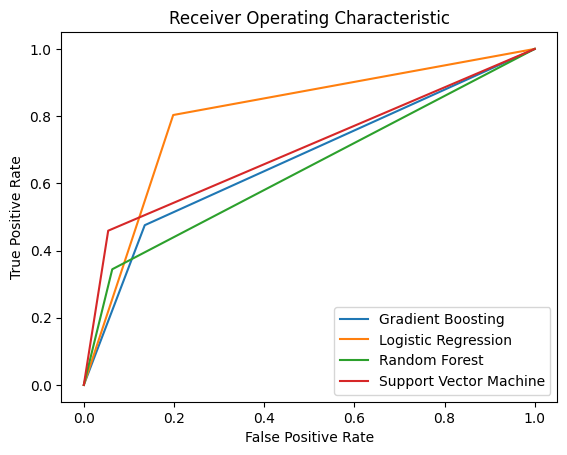

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
# Compute ROC curve for each model
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)


# Plot ROC curves
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine')


# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

# Show the plot
plt.show()


### Tabular comparison of models across different metrics

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate evaluation metrics for each model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
specificity_gb = specificity_score(y_test, y_pred_gb)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
specificity_lr = specificity_score(y_test, y_pred_lr)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
specificity_rf = specificity_score(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
specificity_svm = specificity_score(y_test, y_pred_svm)

# Calculate evaluation metrics
metrics_data = {
    'Model': ['Gradient Boosting', 'Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [accuracy_gb, accuracy_lr, accuracy_rf, accuracy_svm],
    'Precision': [precision_gb, precision_lr, precision_rf, precision_svm],
    'Recall': [recall_gb, recall_lr, recall_rf, recall_svm],
    'F1 Score': [f1_gb, f1_lr, f1_rf, f1_svm],
    'Specificity': [specificity_gb, specificity_lr, specificity_rf, specificity_svm]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set index to Model for better readability
metrics_df.set_index('Model', inplace=True)

# Display DataFrame
metrics_df





,Accuracy,Precision,Recall,F1 Score,Specificity
Model,,,,,
Gradient Boosting,0.726744,0.659091,0.475410,0.552381,0.864865
Logistic Regression,0.802326,0.690141,0.803279,0.742424,0.801802
Random Forest,0.726744,0.750000,0.344262,0.471910,0.936937
Support Vector Machine,0.773256,0.823529,0.459016,0.589474,0.945946


### Barplot visualisation of the models comparision across different metrics

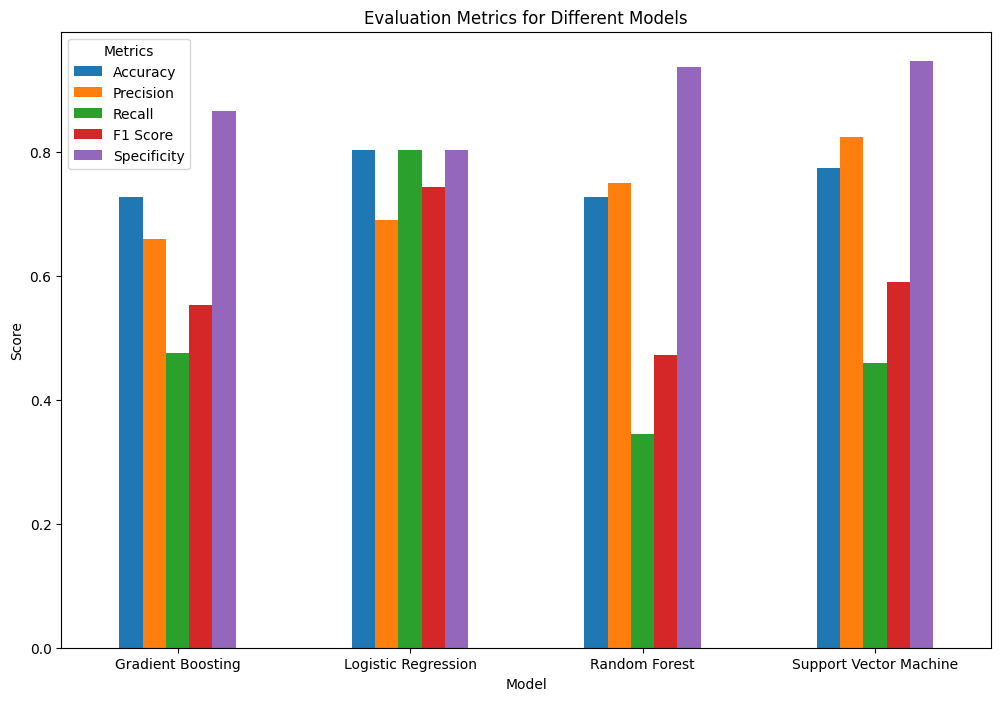

In [45]:
# visualize the metrics

metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Evaluation Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()